# Natural language processing

This week we are going to learn how to work with text data. In previous weeks, we already used techniques like dummy coding in order to work with categorical data. However, there are many different processing techniques that are more suitable for processing text data. After looking at these processing techniques we will train models using this data and we will visualize text data.

This week we will use the [Coronavirus tweet dataset](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification). This dataset contains Twitter (X) tweets about the coronavirus and the accompanying sentiment. Let's load the data first.

In [77]:
import pandas as pd

# Load the tweet data here
tweets = pd.read_csv("/content/Corona_NLP_train.csv")

tweets.head()

UnicodeDecodeError: ignored

The error message you're encountering, typically occurs when you're trying to read a CSV file that contains text using the UTF-8 encoding, but the file contains characters that are not valid UTF-8 sequences. You may need to experiment with different encoding settings to find the one that works for your data. By changing the encoding type to `latin-1` we can load the data correctly.

In [2]:
import pandas as pd

# Load the tweet data here
tweets = pd.read_csv("/content/Corona_NLP_train.csv", encoding='latin-1')

tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Because this week is about working with text data we can continue using the columns `OriginalTweet` and `Sentiment`. Remove the other columns from the DataFrame.

In [3]:
# Remove other columns
tweets = tweets[['OriginalTweet', 'Sentiment']]
tweets.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Let's analyse our target variable `Sentiment`. We can see that there are five classes: Extremely Negative, Negative, Neutral, Positive, Extremely Positive. Do these labels make sense?

In [ ]:
tweets["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

When analysing the Extremely Negative and the Negative labels. I find it hard to determine when a tweet is negative or extremely negative. If a human finds this hard to do, a ML model will probably also have difficulties in predicting correctly.

In [ ]:
print(tweets.loc[(tweets["Sentiment"] == "Extremely Negative"), ["OriginalTweet"]].sample(5))
print(tweets.loc[(tweets["Sentiment"] == "Negative"), ["OriginalTweet"]].sample(5))

                                          OriginalTweet
3893  Hoarding. Empty shelves. Supermarket fights. S...
9615  @megynkelly I agree that we need to focus on w...
8923  This makes me feel sick! "Girl, 13, crushed by...
1619  Hubs told me today that I should stock up on m...
469   San Francisco Curfew: Residents Banned From Le...
                                           OriginalTweet
4548   @stewartbrand @HankGreelyLSJU Wondering if it'...
5158   @DorsetGirl1 @PaddySitsDown @Dis_PPL_Protest @...
8725   Gas prices have dropped drastically I ve actua...
10895  So I am still risking my life working at the g...
2483   People are just selfish, Stop stock piling foo...


To simplify our ML problem slightly let's rename the extremes to just positive or negative.

In [4]:
tweets['Sentiment'] = tweets['Sentiment'].str.replace('Extremely Negative', 'Negative')

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

**Add the missing code!**

Now do the same thing for the extremely positive class. Afterward, show the number of occurences per class.

In [ ]:
# Start coding here
tweets['Sentiment'] = tweets['Sentiment'].str.replace('Extremely Positive', 'Positive')
tweets["Sentiment"].value_counts()
# End coding here

## Processing text data

Before we train a model on text data we need to process the data accordingly. We start with Bag of Words processing otherwise known as Count Vectorization. We saw in the lecture that this method is similar to dummy coding. For every row of text it returns the index of a word together with the number of times the word occurs in the row. Let's look at the code.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(tweets['OriginalTweet'])

print(f"The tweet: {tweets['OriginalTweet'][0]} is transformed to the following matrix:")
print(bow_matrix[0])

The tweet: @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8 is transformed to the following matrix:
  (0, 17842)	1
  (0, 21043)	1
  (0, 5963)	1
  (0, 13674)	3
  (0, 6299)	3
  (0, 14016)	1
  (0, 2723)	2
  (0, 30825)	1
  (0, 13847)	1


The `bow_matrix` contains a list of indices of words together with the counts. We can use the indices to find the accompanying words.

In [ ]:
feature_names = count_vectorizer.get_feature_names_out()

print("Feature Names (Words):")
print(feature_names)

print(f"(0,45640) = {feature_names[45640]}")
print(f"(0,8157) = {feature_names[8157]}")

Feature Names (Words):
['00' '000' '0000' ... 'ã¼berweist' 'ã¼cretsiz' 'ã¼retime']
(0,45640) = menyrbie
(0,8157) = and


While BoW is a useful representation, it has a limitation. It treats all words equally and doesn't consider the importance of each word. TF-IDF is a way to address this issue. It stands for Term Frequency-Inverse Document Frequency.

**Add the missing code!**

Now transform the tweets using `TfidfVectorizer`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Start coding here
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tweets['OriginalTweet'])
# End coding here

print(f"The tweet: {tweets['OriginalTweet'][0]} is transformed to the following matrix:")
print(tfidf_matrix[0])

The tweet: @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8 is transformed to the following matrix:
  (0, 34945)	0.39400086373488136
  (0, 78222)	0.39400086373488136
  (0, 8157)	0.13341941888603484
  (0, 35404)	0.39400086373488136
  (0, 16694)	0.1867065561834113
  (0, 34486)	0.18703308024142698
  (0, 15921)	0.3690191652454988
  (0, 54092)	0.39400086373488136
  (0, 45640)	0.39400086373488136


We need to train the same model a couple of times in this lecture with different data. Therefore, we will create a function that splits the data, trains a random forest model and evaluates its performance.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def test_performance(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=25, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = classification_report(y_test, y_pred)
    print(accuracy)

Let's train the model with BoW preproccessing first.

In [ ]:
test_performance(bow_matrix, tweets['Sentiment'])

              precision    recall  f1-score   support

    Negative       0.67      0.65      0.66      3062
     Neutral       0.64      0.51      0.57      1553
    Positive       0.68      0.76      0.72      3617

    accuracy                           0.67      8232
   macro avg       0.67      0.64      0.65      8232
weighted avg       0.67      0.67      0.67      8232



**Add the missing code!**

Now it's your turn to train the model on data that is preprocessed with TF-IDF.

In [ ]:
# Start coding here
test_performance(tfidf_matrix, tweets['Sentiment'])
# End coding here

              precision    recall  f1-score   support

    Negative       0.65      0.63      0.64      3062
     Neutral       0.65      0.43      0.52      1553
    Positive       0.65      0.77      0.71      3617

    accuracy                           0.65      8232
   macro avg       0.65      0.61      0.62      8232
weighted avg       0.65      0.65      0.65      8232



## Cleaning the text data

In order to work with text data, we need to clean the data first. In this course we use two packages for that: `re` and `nltk`. `re` enables us to write regular expressions which can be effective when filtering very specifically in text data. `nltk` is a package that is focused on Natural Language Processing (NLP). It offers tools to get list of stopwords in multiple languages as well as preprocessors that stem or lemmatize words. Let's start with importing the packages. Afterward, we download the right data that is used by nltk for lemmatization.

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In the provided code, there's a Python function called `clean_text` designed to tidy up tweets. Here's what it does:

1. **Remove URLs**: Replaces web links with the word "websitelink".
2. **Remove HTML Tags**: Gets rid of any HTML tags in the tweet.
3. **Remove Digits**: Eliminates numbers from the tweet.
4. **Remove Mentions**: Turns Twitter mentions (like '@username') into just '@'.
5. **Remove Non-Alphabetic Characters**: Replaces non-alphabetic characters with spaces.
6. **Remove Extra Whitespace**: Ensures only one space between words and converts everything to lowercase.

The function is then applied to a DataFrame called 'tweets', specifically to the 'OriginalTweet' column. The cleaned tweets are stored in a new column called 'clean_tweets'. This kind of cleaning is important when working with text data for machine learning, making sure unnecessary details are removed for better analysis.

In [20]:
def clean_text(tweet):
    # remove urls
    tweet = re.sub(r'http\S+', 'websitelink', tweet)
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    # remove mentions
    tweet = re.sub(r'@\w+','@', tweet)

    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.lower()
    return tweet

tweets['clean_tweets'] = tweets['OriginalTweet'].apply(clean_text)
tweets['clean_tweets']

0              websitelink and websitelink and websitelink
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know it s getting tough when is rationing ...
41155    is it wrong that the smell of hand sanitizer i...
41156     well new used rift s are going for on amazon ...
Name: clean_tweets, Length: 41157, dtype: object

In this step, we're enhancing our cleaned tweets using a tool called a lemmatizer. Think of it like simplifying words to their basic form. This helps in making our text even more consistent for analysis. The lemmatizer takes words and transforms them into their root or base form, ensuring that variations of the same word are treated similarly. This kind of refinement is common in natural language processing (NLP) to improve the performance of our models when working with text data.

In [ ]:
lemmatizer = WordNetLemmatizer()
tweets['lemmatized_tweets'] = tweets['clean_tweets'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In this part, we're doing more to get our text ready for analysis. First, we're grabbing a set of common English words that usually don't carry much meaning in a text. We call these "stopwords." Then, we have a function that takes our lemmatized tweets and removes these unimportant words. This process is like cleaning up our text even further, making it more focused and useful for machine learning tasks.

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

tweets['preprocessed_tweets'] = tweets['lemmatized_tweets'].apply(preprocess_text)
tweets['preprocessed_tweets']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                      websitelink websitelink websitelink
1        advice talk neighbour family exchange phone nu...
2        coronavirus australia woolworth give elderly d...
3        food stock one empty please panic enough food ...
4        ready go supermarket outbreak paranoid food st...
                               ...                        
41152    airline pilot offering stock supermarket shelf...
41153    response complaint provided citing covid relat...
41154    know getting tough rationing toilet paper mart...
41155             wrong smell hand sanitizer starting turn
41156    well new used rift going amazon rn although no...
Name: preprocessed_tweets, Length: 41157, dtype: object

**Add the missing code!**

Evaluate a new model that is trained on the clean text and using the count vectorizer.

*Hint: you can again use the `test_performance` method for training the model.*

In [ ]:
# Start coding here
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(tweets['preprocessed_tweets'])

test_performance(bow_matrix, tweets['Sentiment'])
# End coding here

              precision    recall  f1-score   support

    Negative       0.75      0.71      0.73      3062
     Neutral       0.66      0.72      0.69      1553
    Positive       0.78      0.79      0.79      3617

    accuracy                           0.75      8232
   macro avg       0.73      0.74      0.74      8232
weighted avg       0.75      0.75      0.75      8232



## Embeddings with SentenceTransformers

[SentenceTransformers](https://www.sbert.net/) contains a class of models designed to transform sentences or longer text passages into fixed-size vector representations. These vector representations capture semantic meaning and context, allowing for more effective comparisons and analyses of sentences. Unlike traditional methods that treat words individually, sentence transformers leverage advanced techniques, often based on deep learning architectures, to understand relationships and context within sentences. These models are particularly useful in natural language processing tasks, such as text similarity, sentiment analysis, and other applications where understanding the meaning of entire sentences is crucial.

In [9]:
from sentence_transformers import SentenceTransformer

In this line of code, we're setting up a Sentence Transformer model named `'BAAI/bge-small-en-v1.5'`, but if you go to the documentation page, you can see multiple other models that all can be used if desired. Think of the model as a powerful tool that understands the meaning and context of sentences in English. These models are pre-trained on large amounts of text data, allowing them to transform sentences into numerical representations. This capability is handy for tasks like comparing sentences, summarization, and various other natural language processing applications.

In [33]:
model = SentenceTransformer('BAAI/bge-small-en-v1.5')


In these lines, we're using a Sentence Transformer model to transform a list of words ('cat', 'dog', 'human', 'car', 'man') into numerical vectors. Each word gets converted into a mathematical representation that captures its meaning and context. These vectors can be used for tasks like measuring similarity between words or understanding relationships in a broader context, making it easier for machines to work with and understand language.

In [49]:
strings = ['cat', 'dog', 'human', 'car', 'man']
vectors = model.encode(strings)
vectors

array([[-0.00381778, -0.03585663,  0.02385329, ...,  0.03592763,
         0.05585116,  0.07259032],
       [-0.00966867, -0.07800861,  0.03640031, ...,  0.0029793 ,
         0.01925901,  0.05203847],
       [ 0.01189088,  0.01284242,  0.04389006, ..., -0.00900077,
        -0.02560707, -0.01706192],
       [ 0.01463905,  0.03904432,  0.07065105, ...,  0.02417296,
         0.01121391,  0.02060236],
       [ 0.00239759,  0.01517005,  0.03391154, ..., -0.03873707,
        -0.04853031, -0.03482052]], dtype=float32)

We're using a mathematical measure called cosine similarity to compare the numerical vectors of different words ('cat', 'dog', 'human', 'car', 'man'). The result is a matrix showing how similar each pair of words is to each other. By looking at this matrix, we can understand the relationships and similarities between these words based on their meanings and context.

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vectors)
for i in range(len(strings)):
    for j in range(len(strings)):
        print(f"Similarity between '{strings[i]}' and '{strings[j]}': {similarity_matrix[i, j]}")

Similarity between 'cat' and 'cat': 1.0000001192092896
Similarity between 'cat' and 'dog': 0.7337967157363892
Similarity between 'cat' and 'human': 0.7119252681732178
Similarity between 'cat' and 'car': 0.6915476322174072
Similarity between 'cat' and 'man': 0.5830264091491699
Similarity between 'dog' and 'cat': 0.7337967157363892
Similarity between 'dog' and 'dog': 1.0
Similarity between 'dog' and 'human': 0.761755108833313
Similarity between 'dog' and 'car': 0.6699107885360718
Similarity between 'dog' and 'man': 0.6444849967956543
Similarity between 'human' and 'cat': 0.7119252681732178
Similarity between 'human' and 'dog': 0.761755108833313
Similarity between 'human' and 'human': 0.9999997615814209
Similarity between 'human' and 'car': 0.6777195930480957
Similarity between 'human' and 'man': 0.8355741500854492
Similarity between 'car' and 'cat': 0.6915476322174072
Similarity between 'car' and 'dog': 0.6699107885360718
Similarity between 'car' and 'human': 0.6777195930480957
Similarit

We can now use a dimensionality reduction model to visualize the features. We saw PCA for this purpose already in a previous lesson. For visualizing word embeddings, T-SNE is a much used model. This model can capture much more complex and non-linear data.

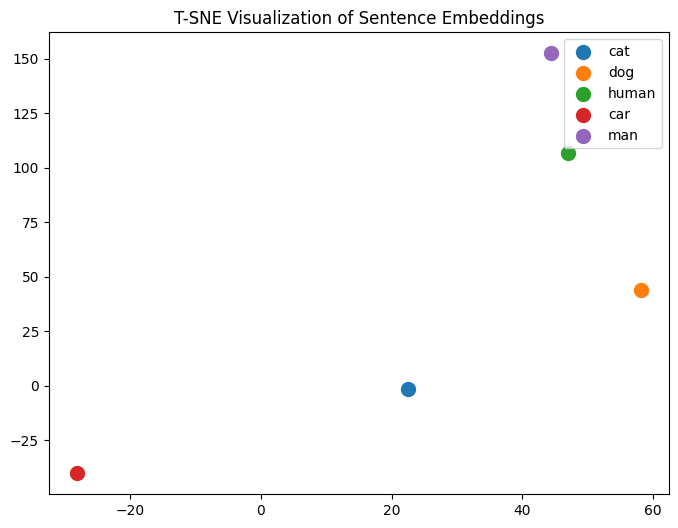

In [57]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# n_components=2 because we want to visualize in 2D
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Visualize the distances in a scatter plot
plt.figure(figsize=(8, 6))
for i in range(len(strings)):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], label=strings[i], s=100)

plt.title('T-SNE Visualization of Sentence Embeddings')
plt.legend()
plt.show()

**Add the missing code!**

Now it's up to you to compare the distance of the words: 'Man', 'Woman', 'King' and 'Queen'.

In [38]:
# Start coding here
strings = ['Man', 'Woman', 'King', 'Queen']
vectors = model.encode(strings)

similarity_matrix = cosine_similarity(vectors)
for i in range(len(strings)):
    for j in range(len(strings)):
        print(f"Similarity between '{strings[i]}' and '{strings[j]}': {similarity_matrix[i, j]}")
# End coding here

Similarity between 'Man' and 'Man': 1.0
Similarity between 'Man' and 'Woman': 0.7128849625587463
Similarity between 'Man' and 'King': 0.6127902269363403
Similarity between 'Man' and 'Queen': 0.5600411295890808
Similarity between 'Woman' and 'Man': 0.7128849625587463
Similarity between 'Woman' and 'Woman': 1.0000004768371582
Similarity between 'Woman' and 'King': 0.5310394167900085
Similarity between 'Woman' and 'Queen': 0.671815812587738
Similarity between 'King' and 'Man': 0.6127902269363403
Similarity between 'King' and 'Woman': 0.5310394167900085
Similarity between 'King' and 'King': 1.0
Similarity between 'King' and 'Queen': 0.735045850276947
Similarity between 'Queen' and 'Man': 0.5600411295890808
Similarity between 'Queen' and 'Woman': 0.671815812587738
Similarity between 'Queen' and 'King': 0.735045850276947
Similarity between 'Queen' and 'Queen': 1.0000001192092896


Now we encode all the tweets. Afterward, we're left is a dataset of 384 numerical features.

In [34]:
embeddings = model.encode(tweets['clean_tweets'].values)
print(embeddings[0,:10])
print(embeddings.shape)

[-0.04609542 -0.07420447  0.03551937 -0.0079312   0.01951552  0.02424188
 -0.02874523  0.01670875  0.0281078  -0.01700428]
(41157, 384)


If we evaluate a model that is trained on the embedded data, we can see that it is less performant than the pre-processing techniques we saw earlier. This is because of the quality of the tweets. As this model is not specifically trained on the tweets, much of the data is out-of-distribution. This causes confusion to the model.

In [37]:
test_performance(embeddings, tweets['Sentiment'])

              precision    recall  f1-score   support

    Negative       0.60      0.67      0.63      3062
     Neutral       0.60      0.19      0.29      1553
    Positive       0.60      0.71      0.65      3617

    accuracy                           0.60      8232
   macro avg       0.60      0.53      0.53      8232
weighted avg       0.60      0.60      0.58      8232



## Homework

InfoGuard is a company that gathers and publishes news articles from various sources. They utilize a dataset containing news articles with corresponding titles, content, and labels (Fake or Real) to develop a model for classifying the authenticity of news.

This platform aims to enhance the reliability of news consumption by providing users with a tool to identify potential misinformation. The model created by InfoGuard helps categorize news articles as either genuine or potentially misleading, offering users a more informed perspective on the news they encounter.

Download the dataset [here](https://www.kaggle.com/datasets/rajatkumar30/fake-news/data).

In this dataset, you have information on news articles, including the title and content, with the goal of distinguishing between real and fake news. The dataset contains three key columns: "Title," "Text" (content of the news), and "Label," where each news article is labeled as either "Fake" or "Real." Your task is to develop a machine learning model that can accurately classify news articles based on these features, helping to identify and differentiate between genuine and misleading information. This classification model can contribute to efforts in addressing the challenge of fake news by automating the process of identifying potentially deceptive news content.

1. How to preprocess the text data?
2. Which model do you pick?
3. Which metric do you focus on?
4. **Bonus question:** Which words are important to make a classification?

In [63]:
data=pd.read_csv('/content/news.csv', index_col=0)
data.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [64]:
data.drop(['title'],axis=1,inplace=True)

In [65]:
def preprocessing(text):
    text = text.strip()                         #Removes Extra White Spaces
    text = text.lower()                         #lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)     #Removes special characters

    return text
data['Clean']=data['text'].apply(preprocessing)


In [66]:
X_train, x_test, y_train, y_test = train_test_split(data['Clean'],
                                                    data['label'],test_size=0.2,
                                                    random_state=42)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Fit and transform the
X_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf= vectorizer.transform(x_test)

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred=model.predict(x_test_tfidf)

I think recall is the best metric to focus on in our case. It's better to classify something as fake so a reader knows that caution is advised. Otherwise, the reader unknowingly reads fake news thinking it's real.

In [70]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.92       628
        REAL       0.93      0.90      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



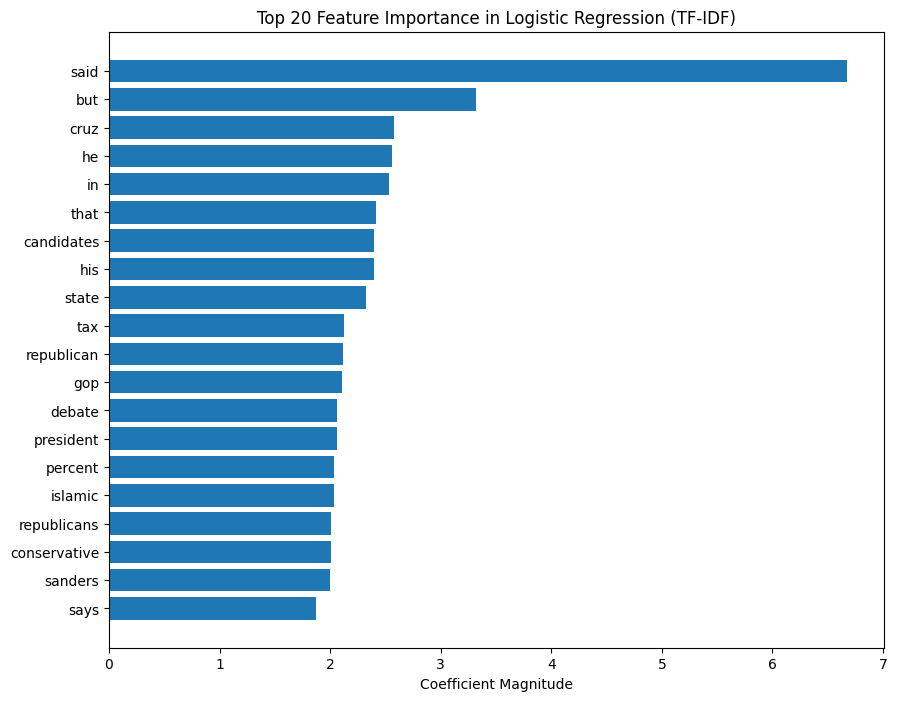

In [73]:
import numpy as np

# Get feature names (words) from the TF-IDF vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

# Get coefficients from the logistic regression model
coefficients = model.coef_[0]

# Sort features based on their coefficients
sorted_indices = np.argsort(coefficients)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_indices[-20:]], coefficients[sorted_indices[-20:]])
plt.xlabel('Coefficient Magnitude')
plt.title('Top 20 Feature Importance in Logistic Regression (TF-IDF)')
plt.show()